# Lecture 2

## The MSE of an estimate (e.g. the case of the sample mean)

This example will demonstrate the formula for the Expected Mean Squared Error of a model on a test sample.

$$EMSE = E[y_0 - \hat f(x_0)]^2 = \text{Var}(\hat f(x_0) + [\text{Bias}(\hat f(x_0))]^2 +\text{Var}(\epsilon)$$

The Expected $MSE_{test}$ describes the prediction properties of a model if we could fit it to a very large number of independent samples, and then test it on a large number of samples of test data.

We will consider a simple task: predicting a draw from the standard normal distribution (i.e. $\mu$=0, $\sigma^2$=1).

So our model is:

$$y_i = \mu+ \epsilon_i, \quad \epsilon_i\sim\mathcal{N}(0,\sigma^2)$$

To do this, we will want to estimate the population mean $\mu$ with the sample mean. Our estimate is therefore

$$\hat{\mu} = \frac{1}{n} \sum_{i=1}^n y_i $$

The Expected MSE is therefore:

$$E[y_0 - \hat \mu]^2 = \text{Var}(\hat \mu) + [\text{Bias}(\hat \mu)]^2 +\text{Var}(\epsilon)$$

For explanatory purposes, we will only draw $S<\infty$ samples of $n<\infty$ observations. Though this isn't ideal, we can't simulate infinite datasets, so it's the best we can do with a computer!

You can change $S$ and $n$ to examine their properties.

In [16]:
S <- 10000 #number of samples
n <- 100 #number of observations per sample

set.seed(1) # set the random number seed for conistent results

y <- replicate(S,rnorm(n,mean=0,sd=1)) #draw S samples from the standard normal distribution, each of size n

samplemeans <- colMeans(y) #take the sample means of each column (sample). 

Notice that each sample mean is different. This is due to the randomness in each of the training samples. We can see this in a histogram.

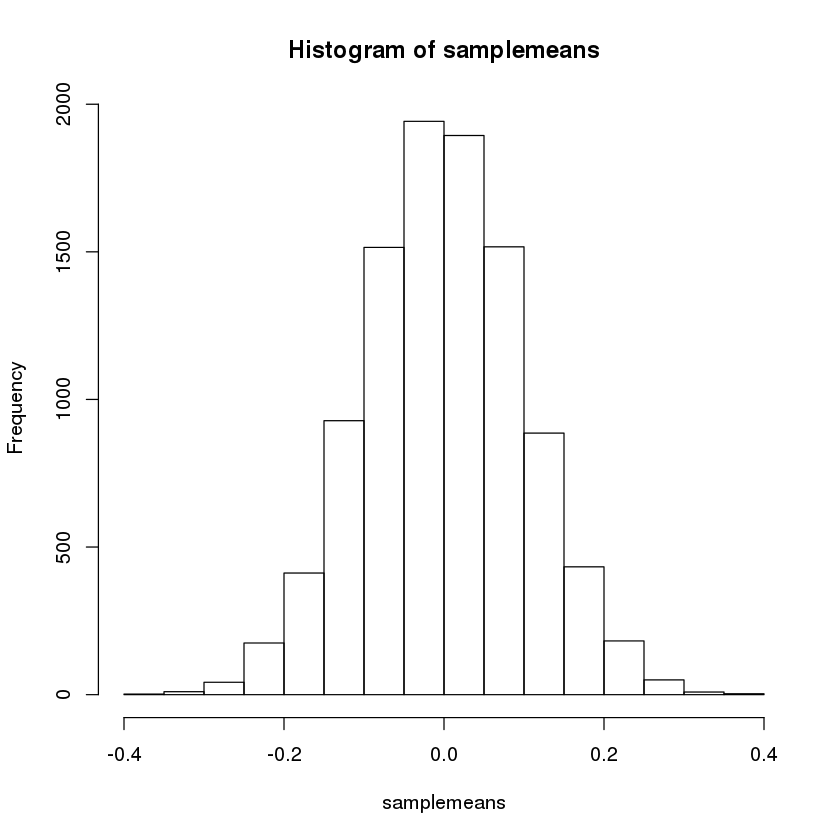

In [7]:
hist(samplemeans)

### Sample mean is unbiased
The average sample mean is very close to the true mean of 0. 

In [23]:
mean(samplemeans)

[1] 4.690776e-05

If we had infinite observations per sample (try say, $n=1000000$), it would be even closer.

You might recall from your stats course that

\begin{align} E[\hat{\mu}]&=E\left[\frac{1}{n} \sum_{i=1}^n y_i \right]\\ &= \frac{1}{n} \sum_{i=1}^n E\left[y_i\right]\\  &= \frac{1}{n} \sum_{i=1}^n E\left[\mu + \epsilon_i\right]\\ 
&= \frac{1}{n} \sum_{i=1}^n \left(E\left[\mu\right]  + E\left[\epsilon_i\right]\right) \\
&= \frac{1}{n} \sum_{i=1}^n \left(\mu  + 0 \right)\\
&= \frac{1}{n} n \mu  \\&=\mu,\end{align}
since $E[\epsilon_i]=0$.

This is the definition of an *unbiased estimate*. For any parameter $\beta$, its estimate $\hat\beta$ is unbiased if: $$E[\hat\beta]=\beta$$

So $\text{Bias}[\hat \mu]=0$. This simplifies the equation for $EMSE_{test}=\text{Var}(\hat \mu) +\text{Var}(\epsilon)$

### Variance of sample mean

We can calculate the sample variance of all of our sample means. This will approach $\text{Var}(\hat\mu)=\frac{\sigma^2}{n}$ as the number of samples $S$ gets large. For $\sigma=1$ and a sample of size n=100, $\text{Var}(\hat\mu)=\frac{1^2}{n}=0.01$

In [12]:
1/n

[1] 0.01

In [11]:
var(samplemeans)

[1] 0.009928185

### Calculating $MSE_{test}$

We can also then use the sample mean to predict a new observation, $y_0$.

In [25]:
y0 <- rnorm(S)

and calculate the average $MSE_{test}$

In [26]:
var(y0-samplemeans)

[1] 1.008125

As the number of samples $S$ become large, this will verify the Expected Mean Squared Error equation.

\begin{align}
EMSE_{test} = E[y_0 - \hat \mu]^2 &= \text{Var}(\hat \mu) +\text{Var}(\epsilon)\\
&=\frac{\sigma^2}{n} + \sigma^2\\
&=\frac{1}{n} + 1. 
\end{align}

In [13]:
1/n + 1

[1] 1.01


However, because we can't simulate infinite samples (like the equation requires) the calculated average $MSE_{test}$ will fluctuate around $EMSE_{test}$. Sometimes, it might even be a tad bit smaller than $\text{Var}(\epsilon)=1$ when $n$ is large.